# Analise dos dados do covid 19 para a cidade de Belo Jardim-PE

  Esse trabalho foi realizado para disciplina de cálculo numérico com o objetivo de aperfeiçoar os conhecimentos 
  na disciplina. Para isso, nesse projeto  foi realizado:

   - A média móvel em um intervalo de 7 dias
   - A análise da curva ideal para com a função A + Bx + Cx^2 a partir do método dos minimos quadrados
   - O cálculo do erro do ajuste
   - O cálculo do erro relativo a partir de uma previsão. 

 ### primeiros passos
   Ao obter os dados do covid com o link: https://covid.saude.gov.br/, foi necessario uma mesclagem, pois os dados estavam separados em 2 partes<br>
   Para realizar as operações de manipulação de tabela e realizar operações matematicas com o mesmo, foi utilizado 2 bibliotecas: pandas e numpy.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tabela_1 = pd.read_csv("covid09ago2022-p1.csv", sep=";")
tabela_2 = pd.read_csv("covid09ago2022-p2.csv", sep=";")
tabela = pd.merge(tabela_1, tabela_2, how = 'outer')

<br>
  <strong>Agora com a tabela pronta para manipulação, o proximo passo foi reestruturar essa tabela apenas com os dados que serão utilizados</strong>
 <br>
 <br>

In [4]:
tabela_mask = tabela["municipio"] == "Belo Jardim"
tabela_bl = tabela[tabela_mask]
tabela_bl = tabela_bl.iloc[ : , [ 1, 2, 13, 7, 11, 10]].reset_index( drop = True).set_index('data')
display(tabela_bl)

,estado,municipio,obitosNovos,casosNovos,casosAcumulado
data,,,,,
2022-01-01,PE,Belo Jardim,0,0,4674.0
2022-01-02,PE,Belo Jardim,0,0,4674.0
2022-01-03,PE,Belo Jardim,0,0,4674.0
2022-01-04,PE,Belo Jardim,0,1,4675.0
2022-01-05,PE,Belo Jardim,0,4,4679.0
...,...,...,...,...,...
2022-08-05,PE,Belo Jardim,0,1,10044.0
2022-08-06,PE,Belo Jardim,0,0,10044.0
2022-08-07,PE,Belo Jardim,0,0,10044.0


 - ### Média movel e seu grafico respectivo
 <br>
     Nessa celula, os valores dos casos novos foram armazenados separadamente, para o calculo
     da média móvel. Onde o primeiro 'for' indica e inicio e o final dos dados que quero coletar e o segundo 'for'
     para realizar a média dentro dos valores desejados, retornando isso em uma nova lista de dados

In [5]:
casos = tabela_bl['casosNovos'].values.astype(int)
media_casos = []
for x in range(6, casos.size):
    sum = 0
    for i in range( x-6, x + 1):
        sum += casos[i]
    
    media_casos.append(sum / float(7))
    

In [6]:
tabela_bl_media = tabela_bl.iloc[ 6 : , [ 3]]
tabela_bl_media['mediaMovel'] = media_casos
#tabela_bl_media = tabela_bl_media.drop(columns=['casosNovos'])
display(tabela_bl_media)


,casosNovos,mediaMovel
data,,
2022-01-07,1,1.000000
2022-01-08,2,1.285714
2022-01-09,2,1.571429
2022-01-10,0,1.571429
2022-01-11,2,1.714286
...,...,...
2022-08-05,1,1.142857
2022-08-06,0,0.714286
2022-08-07,0,0.571429


<AxesSubplot:xlabel='data'>

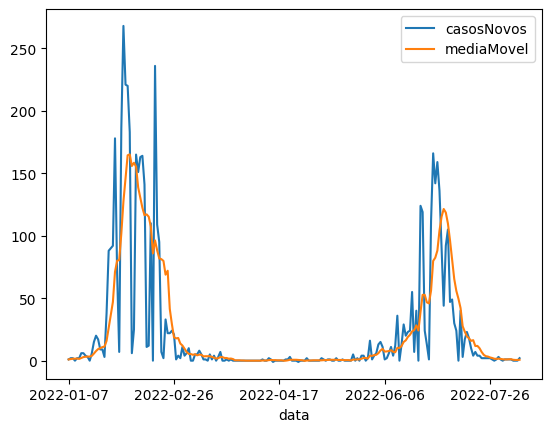

In [7]:
tabela_bl_media.plot()

 ## Método dos minimos quadrados 
   <br>
   Sistema resolvido com eliminação de Gauss

In [183]:
from xmlrpc.client import Boolean


def create_matrix(x):
    matrix = np.empty((0, 3), float)
    matrix = np.append(matrix, np.array([[x.size, x.sum(), (x**2).sum()]]), axis=0)
    matrix = np.append(matrix, np.array([[x.sum(), (x**2).sum(), (x**2).sum()]]), axis=0)
    matrix = np.append(matrix, np.array([[(x**2).sum(), (x**3).sum(), (x**4).sum()]]), axis=0)
    return matrix

def create_yValues_for_matrix(y, x):
    matrix_result = np.empty((0, 3), int)
    matrix_result = np.append(matrix_result, np.array([y.sum(), (x*y).sum(), ((x**2)*y).sum()]))
    return matrix_result

def gauss_method(matrix, results, visibility:Boolean):
    alpha_values = np.empty((0, 3), float)
    m2_1 = matrix[1][0] / matrix[0][0]
    m3_1 = matrix[2][0] / matrix[0][0]
    matrix[1] = matrix[1] - (m2_1 * matrix[0])
    matrix[2] = matrix[2] - (m3_1 * matrix[0])
    results[1] = results[1] - (m2_1 * results[0])
    results[2] = results[2] - (m3_1 * results[0])
    m3_2 = matrix[2][1] / matrix[1][1]
    matrix[2] = matrix[2] - (m3_2 * matrix[1])

    alpha_3 = results[2] / matrix[2][2]
    alpha_2 = (results[1] - (matrix[1][2] * alpha_3))/ matrix[1][1]
    alpha_1 = (results[0] - (matrix[0][1] * alpha_2) - matrix[0][2] * alpha_3) / matrix[0][0]
    alpha_values = np.append(alpha_values, np.array([alpha_1, alpha_2, alpha_3]))
    if visibility:
        print(matrix)
        print(results)

    return alpha_values
                             
tabela_MQ = tabela_bl.iloc[  : ,  4]
casos_confirmados = tabela_MQ.values.astype(int)
a1 = []
a2 = []
a3 = []
erro = []
erro_previsao = []
previsao = []

sum = 0
for x in range(21, casos_confirmados.size):
    sum +=1
    x_values = np.empty((0, 20), int)
    y_values = np.empty((0, 20), int)
    for i in range( x-21, x):
        x_values = np.append(x_values, i)
        y_values = np.append(y_values, casos_confirmados[i])     
    matrix = create_matrix(x_values)
    matrix_result = create_yValues_for_matrix(y_values, x_values)
    alphas = gauss_method(matrix, matrix_result, False)
    a1.append(alphas[0])
    a2.append(alphas[1])
    a3.append(alphas[2])
    erro.append( (abs(alphas[0] + alphas[1]*x + alphas[2]*(x**2) - tabela_MQ[x]) / tabela_MQ[x]))
    function_value = (alphas[0] + alphas[1]*(x)) + alphas[2]*((x)**2)
    prev_value = (alphas[0] + alphas[1]*(x+1)) + alphas[2]*((x+1)**2)
    previsao.append(prev_value)
    if  x!= tabela_MQ.size-1:
        err_prev_value = (abs( prev_value - tabela_MQ[x+1]) / tabela_MQ[x+1])

        erro_previsao.append( '{0:.2f}%'.format(err_prev_value))
    else:
        erro_previsao.append('-')



tabela_MQ = tabela_MQ.to_frame()
tabela_MQ = tabela_MQ[tabela_MQ.index>="2022-01-22"]
tabela_MQ.insert(0,'previsao', previsao)
tabela_MQ.insert(0, 'err.pol', erro)
tabela_MQ.insert(0, 'a3.pol', a3)
tabela_MQ.insert(0, 'a2.pol', a2)
tabela_MQ.insert(0, 'a1.pol', a1)
tabela_MQ['erroPrevisao'] = erro_previsao
display(tabela_MQ)

,a1.pol,a2.pol,a3.pol,err.pol,previsao,casosAcumulado,erroPrevisao
data,,,,,,,
2022-01-22,4626.122085,6.100724,0.073618,0.002451,4795.969211,4775.0,0.00%
2022-01-23,4609.260427,7.400750,0.071869,0.004779,4817.496301,4784.0,0.01%
2022-01-24,4590.571846,8.690261,0.068541,0.008295,4838.617868,4787.0,0.00%
2022-01-25,4572.234068,9.797334,0.063305,0.003903,4856.732762,4825.0,0.01%
2022-01-26,4542.877871,11.598942,0.062316,0.008386,4886.575950,4913.0,0.02%
...,...,...,...,...,...,...,...
2022-08-05,9007.010724,4.968741,0.000011,0.003659,10085.725692,10044.0,0.00%
2022-08-06,9196.822345,4.039105,0.000008,0.002958,10077.750182,10044.0,0.00%
2022-08-07,9317.717804,3.447091,0.000007,0.002541,10072.972715,10044.0,0.00%


 ## Agora com a planilha MMQ pronta, um plot deve ser realizado para a visualização desses dados

    esse plot será feito a partir da mesclagem de dois graficos

 ## Primeiro Plot do ajuste
  O primeiro plot será realizado durante o surto de casos novos ocorridos na cidade no mês de janeiro ao final do mês de fevereiro, portanto é esperado uma dificuldade em realizar o ajuste

<Figure size 300x200 with 0 Axes>

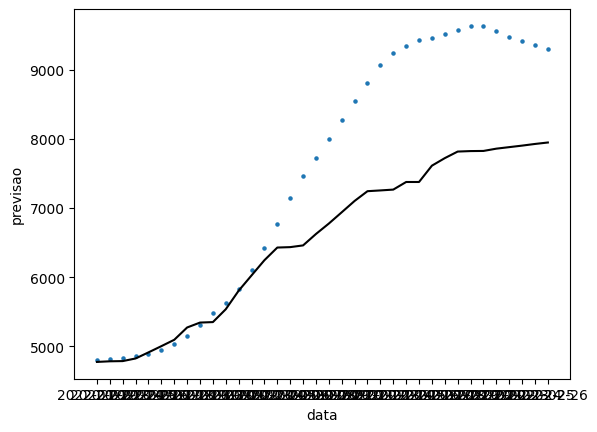

In [170]:


plt.figure(figsize = (3, 2))
mask_data = tabela_MQ[tabela_MQ.index <= '2022-02-26']
graf_previsoes = mask_data.reset_index().plot(kind='scatter', marker='.', x='data', y='previsao')
#plt.scatter(tabela_MQ.index, tabela_MQ['previsao'], )
graf_acumulados = plt.plot(mask_data['casosAcumulado'], c='k')

  ##  segundo plot
   
    foi selecionado o periodo em que o o numero de casos novos se manteve constante, logo o ajuste esperado deverá ser muito proximo da realidade e com previsões precisas.

<Figure size 300x200 with 0 Axes>

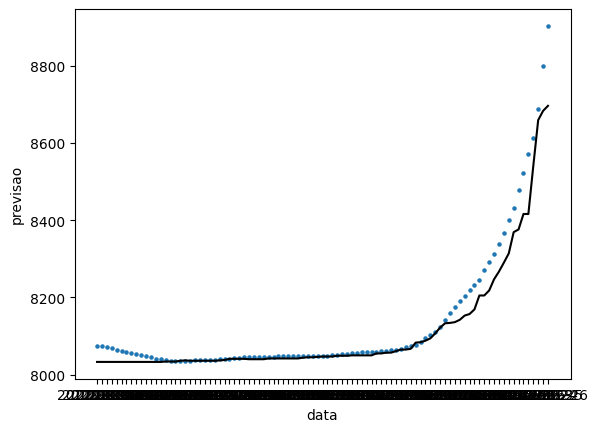

In [182]:

plt.figure(figsize = (3, 2))
mask_data = tabela_MQ[tabela_MQ.index >= '2022-03-26']
mask_data = mask_data[mask_data.index <= '2022-06-26']
graf_previsoes = mask_data.reset_index().plot(kind='scatter', marker='.', x='data', y='previsao')
#plt.scatter(tabela_MQ.index, tabela_MQ['previsao'], )
graf_acumulados = plt.plot(mask_data['casosAcumulado'], c='k')

 ## Terceiro Plot
 
     É possivel notar que no ultimo plot realizado, ouve um crescimento exponencial no numero de casos durante o mês de junho, esse fato acaba deturpando o ajuste para realizar possiveis previsões precisas. Levando isso em consideração, se no mês de agosto o número de casos novos voltar a ficar sob controle, resultará em previsões ainda tendendo ao crescimento, gerando assim uma imprecisão maior, como visto no plot abaixo.

<Figure size 300x200 with 0 Axes>

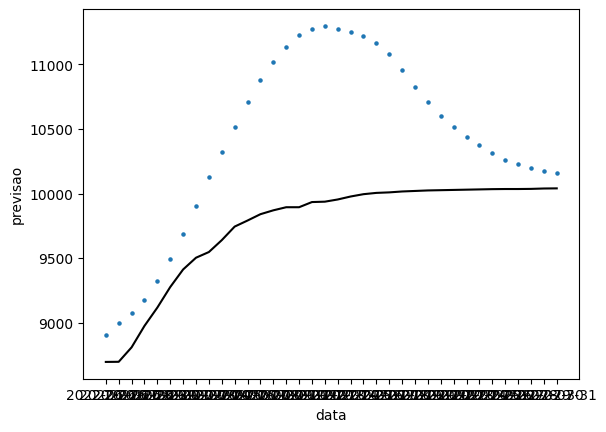

In [176]:
plt.figure(figsize = (3, 2))
mask_data = tabela_MQ[tabela_MQ.index >= '2022-06-26']
mask_data = mask_data[mask_data.index <= '2022-08-00']
graf_previsoes = mask_data.reset_index().plot(kind='scatter', marker='.', x='data', y='previsao')
#plt.scatter(tabela_MQ.index, tabela_MQ['previsao'], )
graf_acumulados = plt.plot(mask_data['casosAcumulado'], c='k')

  ## Resumindo

    A partir da análise desses dados, é possível notar 2 surtos de covid na cidade de Belo Jardim-PE em relação ao primeiro muito não foi possível chegar a uma conclusão sobre o porquê, porém no segundo surto que ocorreu durante o mês de junho e julho, pode ser resultado de um festival realizado na cidade durante esse período, o festival Festa das Marocas, que nesse ano foi realizado a sua 53º edição. Mesmo levando isso em consideração, não pode ser considerado como o verdadeiro motivo, já que a ação do covid não está simplesmente diretamente ligada a aglomeração, além disso deve se levar em consideração as ondas de surtos ocorridos, onde após cada surto o covid se estabiliza e volta futuramente com uma onda menor que a anterior, como foi apresentado também no gráfico móvel.

<br>

*obs: As células abaixo servem apenas para demostrar o funcionamento das funções que constroem a matriz pelo método MMQ*

In [188]:
teste_x = np.array([-1, 0, 1, 2])
teste_y = np.array([0, -1, 0, 7])
matrix_teste = create_matrix(teste_x)
matrix_result_teste = create_yValues_for_matrix(teste_y, teste_x)
print("sistema linear gerado a partir do MMQ: ")
print(matrix_teste)
print(matrix_result_teste)
print("\nAplicando metodo de Gauss:")
teste_alphas = gauss_method(matrix_teste, matrix_result_teste, True)

sistema linear gerado a partir do MMQ: 
[[ 4.  2.  6.]
 [ 2.  6.  6.]
 [ 6.  8. 18.]]
[ 6 14 28]

Aplicando metodo de Gauss:
[[4. 2. 6.]
 [0. 5. 3.]
 [0. 0. 6.]]
[ 6 11 19]
